In [2]:
import sys
sys.path.append('..\\utils')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from MiguelTK import *

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
3578,0.66,0.92,2,102,4,0,0,0,product_mng,medium
30,0.09,0.62,6,294,4,0,1,0,accounting,low
4310,0.60,0.78,4,152,3,1,0,0,technical,medium
2002,0.45,0.69,5,193,3,0,0,0,sales,low
9229,0.83,0.91,3,251,2,0,0,0,RandD,medium


In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   Department             14999 non-null  category
 9   salary                 14999 non-null  category
 10  delta                  14999 non-null  float64 
dtypes: category(5), float64(3), int64(3)
memory usage: 777.3 KB


In [67]:
cat_vars = [
    'salary',
    'Department',
    'promotion_last_5years',
    'left',
    'Work_accident'
]

for var in cat_vars:
    df[var] = pd.Categorical(df[var])

# Contexto

<Axes: xlabel='satisfaction_level', ylabel='Count'>

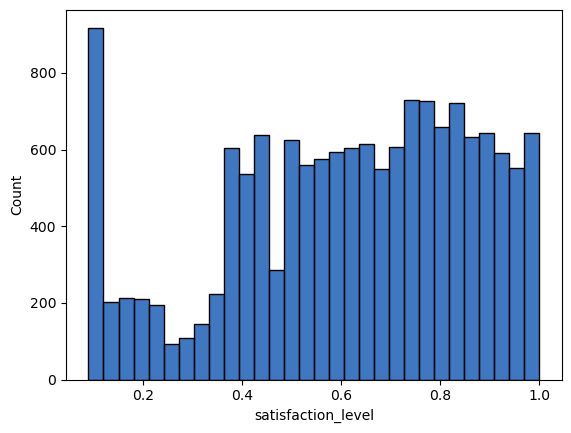

In [9]:
sns.histplot(
    data = df,
    x = 'satisfaction_level',
    color = palette[0]
)

In [10]:
df['satisfaction_level'].mean()

0.6128335222348156

<Axes: xlabel='average_montly_hours', ylabel='Count'>

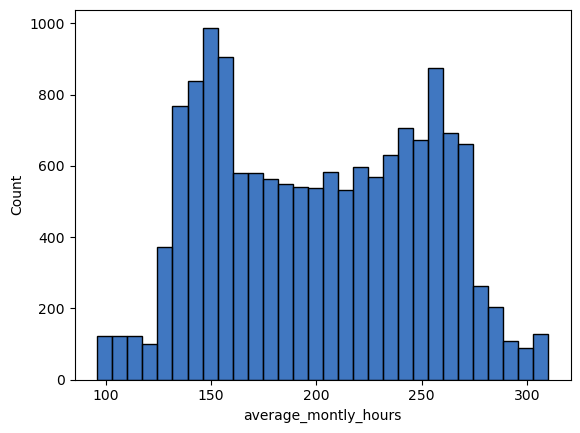

In [11]:
sns.histplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0]
)

<Axes: xlabel='average_montly_hours', ylabel='Density'>

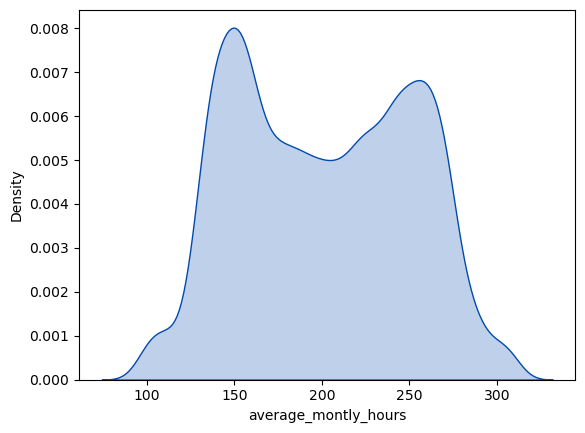

In [12]:
sns.kdeplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0],
    fill = True
)

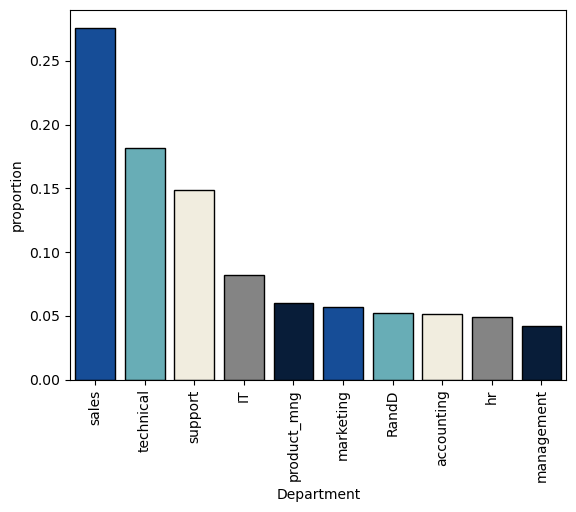

In [34]:
sns.barplot(
    data = df['Department'].value_counts(normalize=True).to_frame(),
    x = 'Department',
    y = 'proportion',
    hue = 'Department',
    **kwargs
)
rot_show()

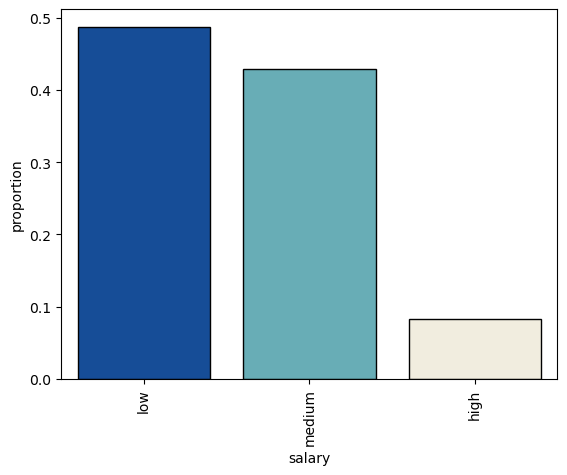

In [35]:
sns.barplot(
    data = df['salary'].value_counts(normalize=True).to_frame(),
    x = 'salary',
    y = 'proportion',
    hue = 'salary',
    **kwargs
)
rot_show()

In [15]:
df['delta'] = df['satisfaction_level'] - df['last_evaluation']

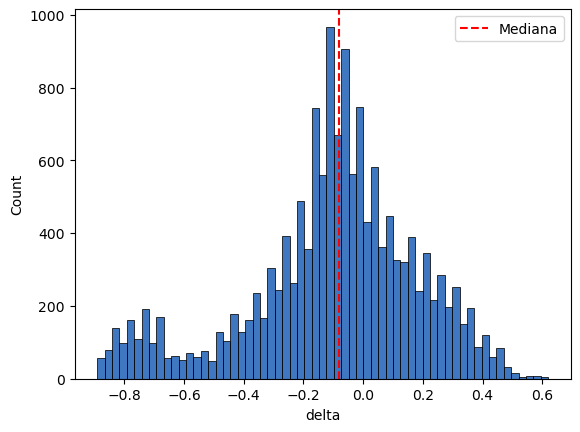

In [36]:
sns.histplot(
    data = df,
    x = 'delta',
    color = palette[0]
)
plt.axvline(df['delta'].median(),color='red',ls='--',label='Mediana')
plt.legend()

In [17]:
df['delta'].mean()

-0.10326821788119209

## Probabilidad de dejar la compañía 

In [25]:
variables = [
    'Department',
    'salary',
    'Work_accident',
    'promotion_last_5years'
]

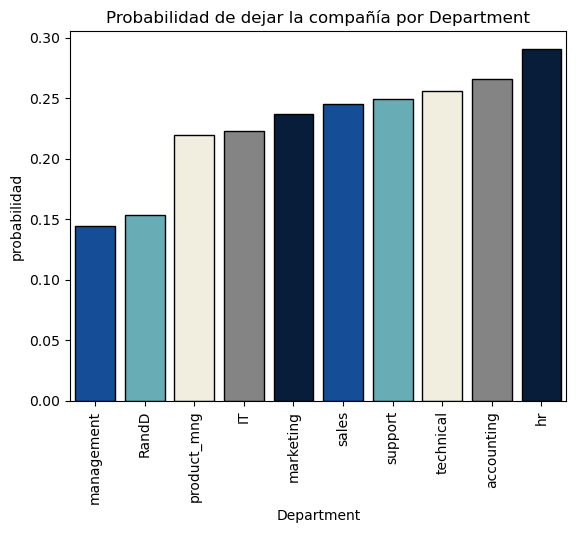

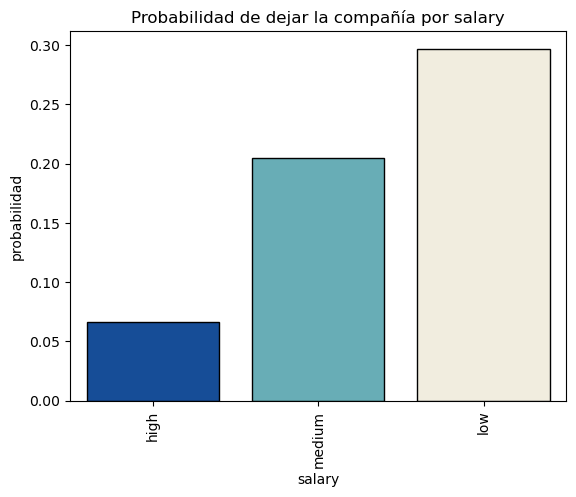

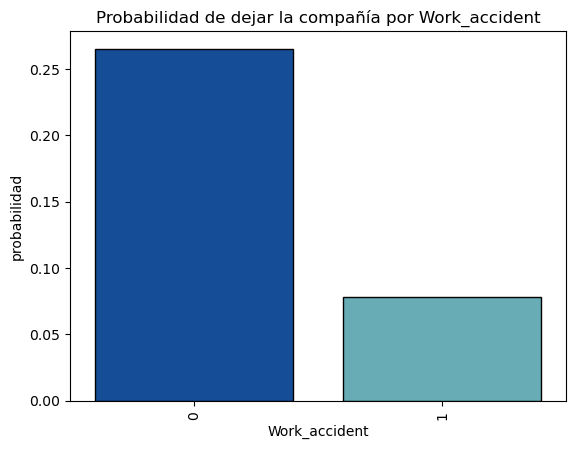

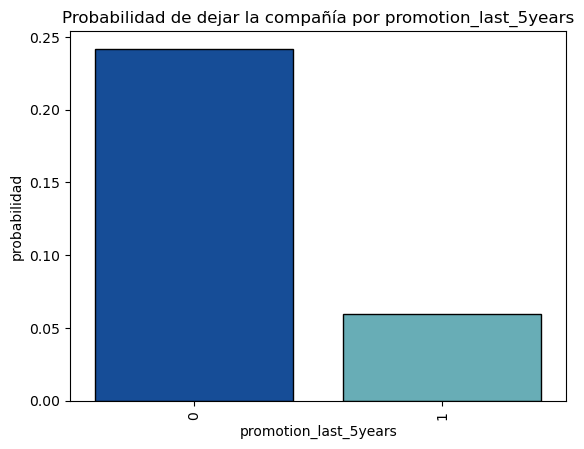

In [38]:
for var in variables:
    df_ = (
        df
        .groupby(var)
        ['left']
        .mean()
        .rename('probabilidad')
        .sort_values()
        .to_frame()
    )


    sns.barplot(
        data = df_,
        x = var,
        y = 'probabilidad',
        **kwargs
    )
    plt.title(f'Probabilidad de dejar la compañía por {var}')
    rot_show()

## Correlación de las evaluaciones

In [39]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'delta'],
      dtype='object')

In [40]:
dep_vars = ['satisfaction_level','last_evaluation','delta']

<Axes: xlabel='feature'>

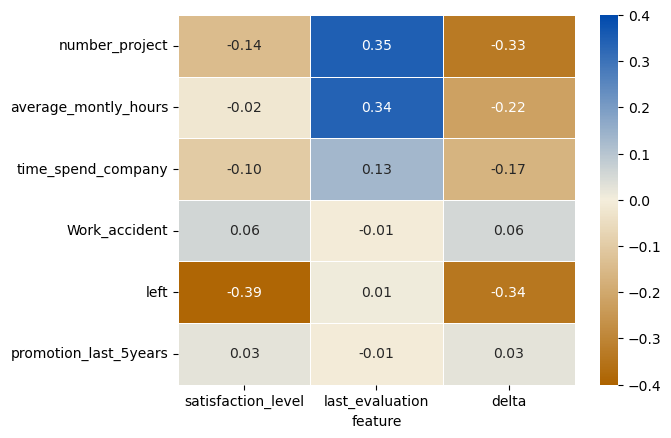

In [61]:
corr = (
    df
    .select_dtypes('number')
    .corr()
    .reset_index(names='feature')
    .query('feature.isin(@dep_vars)')
    .drop(columns=dep_vars)
    .set_index('feature')
    .transpose()
)

sns.heatmap(
    data = corr,
    annot = True,
    fmt='.2f',
    linewidths = .5,
    cmap = cmap,
    vmax = .4,
    vmin = -.4
)

### Número de proyectos

In [83]:
cat_vars = df.select_dtypes('category').columns

In [84]:
cat_vars

Index(['Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')

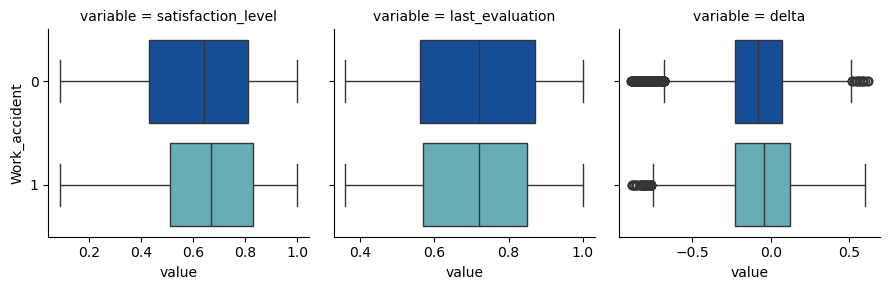

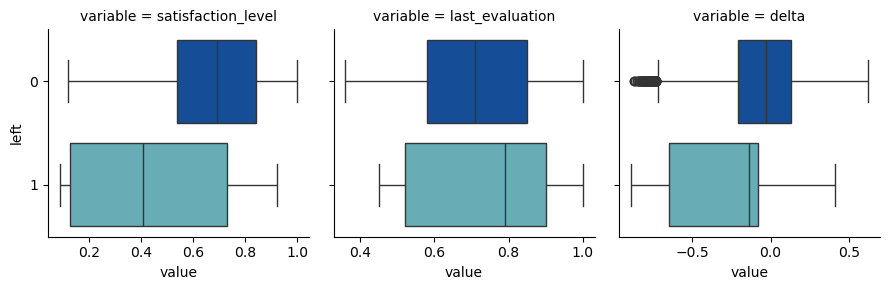

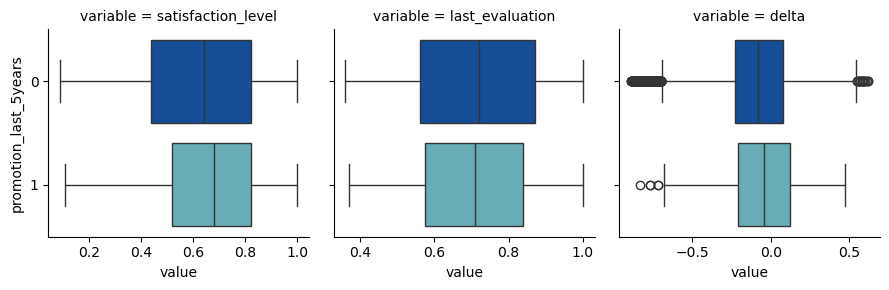

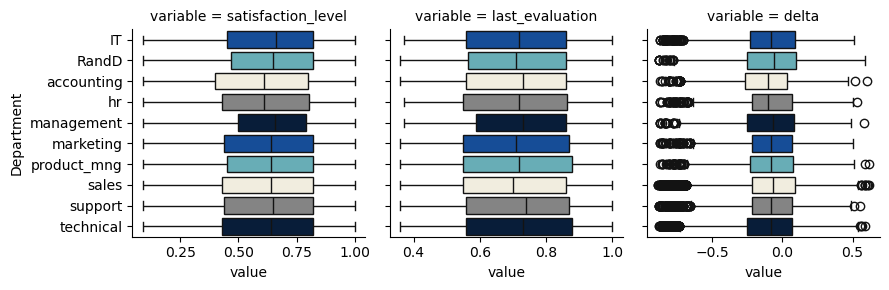

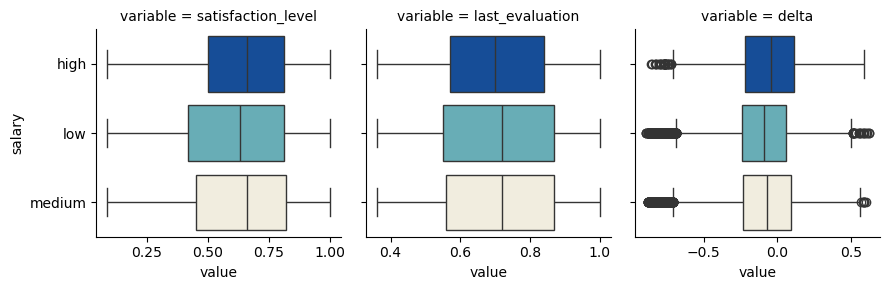

In [85]:
for var in cat_vars:
    df_ = (
        df
        [dep_vars + [var]]
        .melt(var)
    )
    grid = sns.FacetGrid(df_,col='variable',sharex=False)
    grid.map(sns.boxplot,'value',var,palette=palette)